# Movie Review Classifier Using Naive Bayes:

### Problem Statement:

There are two categories: Pos (reviews that express a positive or favorable sentiment) and Neg (reviews that express a negative or unfavorable sentiment). For this assignment, we will assume that all reviews are either positive or negative; there are no neutral reviews.

- Perform sentiment analysis on the text reviews to determine whether its positive or negative and build confusion matrix to determine the accuracy.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
review_df = pd.read_csv("movie.csv")

In [3]:
review_df.head(10)

,class,text
0,Pos,films adapted from comic books have had plent...
1,Pos,every now and then a movie comes along from a...
2,Pos,you ve got mail works alot better than it des...
3,Pos,jaws is a rare film that grabs your atte...
4,Pos,moviemaking is a lot like being the general m...
5,Pos,on june 30 1960 a self taught idealisti...
6,Pos,apparently director tony kaye had a major b...
7,Pos,one of my colleagues was surprised when i tol...
8,Pos,after bloody clashes and independence won l...
9,Pos,the american action film has been slowly drow...


In [4]:
review_df.tail()

,class,text
1995,Neg,if anything stigmata should be taken as...
1996,Neg,john boorman s zardoz is a goofy cinemati...
1997,Neg,the kids in the hall are an acquired taste ...
1998,Neg,there was a time when john carpenter was a gr...
1999,Neg,two party guys bob their heads to haddaway s ...


In [5]:
review_df.describe()

,class,text
count,2000,2000
unique,2,2000
top,Pos,billy crystal reappears in yet another high c...
freq,1000,1


In [6]:
review_df['class'].value_counts(0)

Pos    1000
Neg    1000
Name: class, dtype: int64

In [7]:
review_df['class'].count()

2000

### Visualisation:

In [8]:
# Add a Features length(Text) in dataset
review_df['length'] = review_df['text'].apply(len)
review_df.head()


,class,text,length
0,Pos,films adapted from comic books have had plent...,4228
1,Pos,every now and then a movie comes along from a...,4097
2,Pos,you ve got mail works alot better than it des...,2422
3,Pos,jaws is a rare film that grabs your atte...,6093
4,Pos,moviemaking is a lot like being the general m...,3899


In [9]:
review_df

,class,text,length
0,Pos,films adapted from comic books have had plent...,4228
1,Pos,every now and then a movie comes along from a...,4097
2,Pos,you ve got mail works alot better than it des...,2422
3,Pos,jaws is a rare film that grabs your atte...,6093
4,Pos,moviemaking is a lot like being the general m...,3899
5,Pos,on june 30 1960 a self taught idealisti...,5367
6,Pos,apparently director tony kaye had a major b...,4541
7,Pos,one of my colleagues was surprised when i tol...,3684
8,Pos,after bloody clashes and independence won l...,1725
9,Pos,the american action film has been slowly drow...,2541


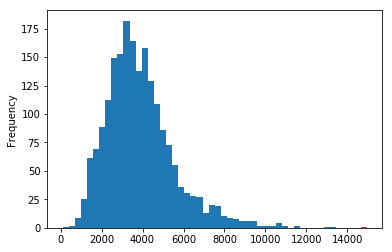

In [10]:
review_df['length'].plot(bins=50, kind='hist') 

In [11]:
review_df['length'].describe()

count     2000.000000
mean      3894.002000
std       1712.425852
min         92.000000
25%       2738.750000
50%       3623.500000
75%       4721.250000
max      14958.000000
Name: length, dtype: float64

### Divide the text into Pos & Neg

In [12]:
pos = review_df[review_df['class']=='Pos']

In [13]:
neg = review_df[review_df['class']=='Neg']

In [14]:
pos

,class,text,length
0,Pos,films adapted from comic books have had plent...,4228
1,Pos,every now and then a movie comes along from a...,4097
2,Pos,you ve got mail works alot better than it des...,2422
3,Pos,jaws is a rare film that grabs your atte...,6093
4,Pos,moviemaking is a lot like being the general m...,3899
5,Pos,on june 30 1960 a self taught idealisti...,5367
6,Pos,apparently director tony kaye had a major b...,4541
7,Pos,one of my colleagues was surprised when i tol...,3684
8,Pos,after bloody clashes and independence won l...,1725
9,Pos,the american action film has been slowly drow...,2541


In [15]:
neg

,class,text,length
1000,Neg,plot two teen couples go to a church party ...,4044
1001,Neg,the happy bastard s quick movie review damn ...,1371
1002,Neg,it is movies like these that make a jaded mov...,2849
1003,Neg,quest for camelot is warner bros fir...,2930
1004,Neg,synopsis a mentally unstable man undergoing...,4419
1005,Neg,capsule in 2176 on the planet mars police t...,3912
1006,Neg,so ask yourself what 8mm eight millim...,3366
1007,Neg,that s exactly how long the movie felt to me ...,3555
1008,Neg,call it a road trip for the walking wounded ...,4546
1009,Neg,plot a young french boy sees his parents ki...,4554


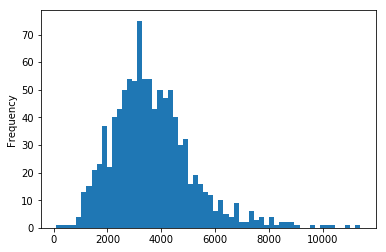

In [16]:
neg['length'].plot(bins=60, kind='hist') 

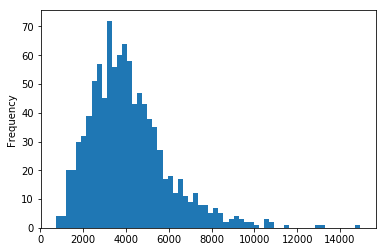

In [17]:
pos['length'].plot(bins=60, kind='hist') 

In [18]:
print( 'Neg percentage =', (len(neg) / len( review_df ))*100,"%")

Neg percentage = 50.0 %


In [19]:
print( 'Pos percentage =', (len(pos) / len( review_df) )*100,"%")

Pos percentage = 50.0 %


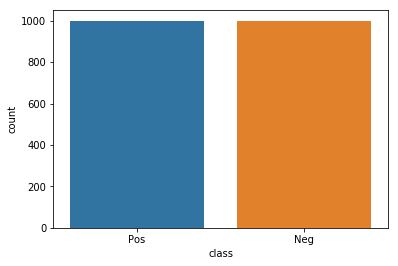

In [20]:
sns.countplot(review_df['class'], label = "Count") 

In [21]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [22]:
# Download stopwords Package to execute this command
# import nltk
# nltk.download('stopwords')

from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [23]:
# The Function performs the following: (1) remove punctuation, (2) remove stopwords

def msg_cleaning(msg):
    Test_punc_removed = [char for char in msg if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean



In [24]:
review_df_clean = review_df['text'].apply(msg_cleaning)

In [25]:
review_df_clean

0       [films, adapted, comic, books, plenty, success...
1       [every, movie, comes, along, suspect, studio, ...
2       [got, mail, works, alot, better, deserves, ord...
3       [jaws, rare, film, grabs, attention, shows, si...
4       [moviemaking, lot, like, general, manager, nfl...
5       [june, 30, 1960, self, taught, idealistic, yet...
6       [apparently, director, tony, kaye, major, batt...
7       [one, colleagues, surprised, told, willing, se...
8       [bloody, clashes, independence, lumumba, refus...
9       [american, action, film, slowly, drowning, dea...
10      [watching, rat, race, last, week, noticed, che...
11      [noticed, something, lately, never, thought, p...
12      [synopsis, bobby, garfield, yelchin, lives, sm...
13      [synopsis, movie, steven, spielberg, one, toda...
14      [police, negotiator, person, entirely, unenvia...
15      [plot, young, man, loves, heavy, metal, music,...
16      [carry, matron, last, great, carry, film, opin...
17      [ultim

In [26]:
print(review_df_clean[0])

['films', 'adapted', 'comic', 'books', 'plenty', 'success', 'whether', 'superheroes', 'batman', 'superman', 'spawn', 'geared', 'toward', 'kids', 'casper', 'arthouse', 'crowd', 'ghost', 'world', 'never', 'really', 'comic', 'book', 'like', 'hell', 'starters', 'created', 'alan', 'moore', 'eddie', 'campbell', 'brought', 'medium', 'whole', 'new', 'level', 'mid', '80s', '12', 'part', 'series', 'called', 'watchmen', 'say', 'moore', 'campbell', 'thoroughly', 'researched', 'subject', 'jack', 'ripper', 'would', 'like', 'saying', 'michael', 'jackson', 'starting', 'look', 'little', 'odd', 'book', 'graphic', 'novel', '500', 'pages', 'long', 'includes', 'nearly', '30', 'consist', 'nothing', 'footnotes', 'words', 'dismiss', 'film', 'source', 'get', 'past', 'whole', 'comic', 'book', 'thing', 'might', 'find', 'another', 'stumbling', 'block', 'hell', 'directors', 'albert', 'allen', 'hughes', 'getting', 'hughes', 'brothers', 'direct', 'seems', 'almost', 'ludicrous', 'casting', 'carrot', 'top', 'well', 'a

In [27]:
# Apply count vectorizer 
from sklearn.feature_extraction.text import CountVectorizer

# Define the cleaning function
vectorizer = CountVectorizer(analyzer = msg_cleaning)
review_countvectorizer = vectorizer.fit_transform(review_df['text'])


In [28]:
print(vectorizer.get_feature_names())


['\x05', '\x13earth', '\x13goodies', '\x13if', '\x13ripley', '\x13suspend', '\x13they', '\x13white\x14', '\x14', '\x16', '0', '00', '000', '0009f', '007', '00s', '010', '03', '04', '05', '05425', '1', '10', '100', '1000', '10000', '100m', '101', '1010', '102', '103', '103196', '104', '105', '106', '107', '108', '109', '10a', '10b', '10s', '10th', '11', '110', '111', '111900', '112', '112097', '113', '1138', '114', '115', '117', '118', '11th', '12', '120th', '121', '122', '123', '125', '125th', '126', '127', '1272', '128', '129', '1298', '12997', '12th', '13', '130', '1305', '131', '132', '133', '135', '137', '138', '139', '13th', '14', '140', '1400', '143', '144', '14th', '15', '150', '1500s', '150th', '151', '152', '1521', '153', '155', '1554', '157', '1583', '1590', '15th', '16', '160', '1600', '1600s', '161', '165', '167', '1692', '16mm', '16th', '16x9', '17', '170', '1700s', '1709', '172', '175', '1773', '1791', '1792', '1793', '1794', '1799', '17th', '18', '180', '1800', '1800s', 

In [29]:
print(review_countvectorizer.toarray())  

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [30]:
review_countvectorizer.shape

(2000, 39705)

### Naive Bayes:

In [31]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()

In [32]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
review_df['class']=labelencoder.fit_transform(review_df['class'])

In [33]:
label = review_df['class'].values
NB_classifier.fit(review_countvectorizer,label)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [34]:
test_sample = ['unbelievable new homes made easy  im wanting to show you this  homeowner  you have been pre - approved']
test_sample_countvectorizer = vectorizer.transform(test_sample)


In [35]:
test_predict = NB_classifier.predict(test_sample_countvectorizer)
test_predict

array([0])

In [36]:
X = review_countvectorizer
y = label

In [37]:
X.shape

(2000, 39705)

In [38]:
y.shape

(2000,)

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [40]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

### Evaluation:

In [41]:
from sklearn.metrics import classification_report, confusion_matrix


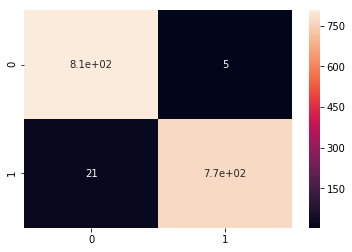

In [42]:
y_predict_train = NB_classifier.predict(X_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

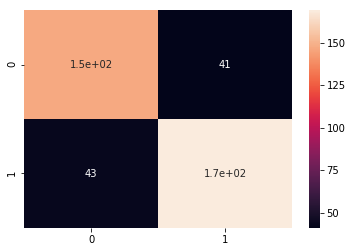

In [43]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [44]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.77      0.78      0.78       188
           1       0.80      0.80      0.80       212

    accuracy                           0.79       400
   macro avg       0.79      0.79      0.79       400
weighted avg       0.79      0.79      0.79       400



In [45]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict_test)

0.79